In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings("ignore")
# clf = LinearRegression()
clf = AdaBoostRegressor(learning_rate=0.1)
file_name = 'NX'
data = pd.read_csv(file_name+'.csv')
data.set_index('Day',inplace=True)
rolling_num = 7
data['Last_day_value'] = pd.to_numeric(data['Last_day_value'])
data['Today_value'] = pd.to_numeric(data['Today_value'])
# for i in range(rolling_num,1486):
#      data.iloc[i:i+1,3] = data.iloc[i-rolling_num:i,4].mean()   
data['Last_day_value'] = data['Today_value'].rolling(window=rolling_num).mean()
data['Day_num'] = data['Today_value'].rolling(window=15).mean()
data.drop('Day_num',axis=1,inplace=True)
data[rolling_num:]

,Year,Month,Last_day_value,Today_value
Day,,,,
2015/1/13,2015,1,-435.9,-435.9
2015/1/14,2015,1,-435.9,-435.9
2015/1/15,2015,1,-435.9,-435.9
2015/1/16,2015,1,-435.9,-435.9
2015/1/20,2015,1,-435.9,-435.9
...,...,...,...,...
2021/11/24,2021,11,NaN,NaN
2021/11/25,2021,11,NaN,NaN
2021/11/26,2021,11,NaN,NaN


In [2]:
np.isnan(data[rolling_num:1436]).any()

Year              False
Month             False
Last_day_value    False
Today_value       False
dtype: bool

In [3]:
def regression(num):
    """fit model"""
    train = data[rolling_num:num]
    x_train = train.drop(train.columns[len(train.columns)-1],axis=1)
    y_train = pd.DataFrame(train[train.columns[-1]])
    test = data[num:num+1]
    x_test = test.drop(test.columns[len(test.columns)-1],axis=1)
    model = clf.fit(x_train, y_train)
    pred_value = model.predict(x_test)
    return pred_value 

In [4]:
weight_value_count = data.iloc[1236:1236+408]
weight_value = []
for index , row in weight_value_count.iterrows():
    weight = (row['Today_value'] - row['Last_day_value'])/row['Today_value']
    if weight == float("-inf"):
        weight = 0
    weight_value.append(weight)
weight_value = pd.DataFrame(weight_value)
weight_value.fillna(0,inplace=True)
weight_value = weight_value[0].values.tolist()
weight_value

[1.8214874434683276e-15,
 0.08675463602433538,
 0.07229553002027982,
 0.05783642401622425,
 0.0433773180121688,
 0.028918212008113234,
 0.01445910600405767,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 2.1048787070449375e-15,
 -0.1339540573603349,
 -0.111628381133612,
 -0.08930270490688924,
 -0.06697702868016649,
 -0.04465135245344374,
 -0.022325676226720857,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929777927005524e-15,
 1.8929

In [5]:
import random
for i in range(1447,len(data)): #  408 count
    print(i-1446)
    data.iloc[i:i+1,2] = data.iloc[i-rolling_num:i,3].mean()# 赋值Last_Day_value
#     data.iloc[i:i+1,2] = data.iloc[i-15:i,4].mean()# 赋值Last_Day_value
    pred = regression(i)
    print(pred)
    data.iloc[i:i+1,3] = pred * (1+weight_value[i-1447])
    if data.iloc[i:i+1,3].values > -400:
        data.iloc[i:i+1,3] = data.iloc[i:i+1,3] *  (1+random.random()*0.25)
    if data.iloc[i:i+1,3].values < -650:
        data.iloc[i:i+1,3] = data.iloc[i:i+1,3] * (1-random.random()*0.25)

1
[-643.03793103]
2
[-648.32051282]
3
[-650.70389808]
4
[-649.94647966]
5
[-605.32413911]
6
[-607.08399132]
7
[-608.98404558]
8
[-608.49171885]
9
[-609.77554954]
10
[-605.65347841]
11
[-606.53584001]
12
[-603.94459483]
13
[-603.35400927]
14
[-605.34937242]
15
[-608.94296168]
16
[-602.61471626]
17
[-602.56102318]
18
[-602.65712537]
19
[-604.4372267]
20
[-601.82523994]
21
[-599.80218802]
22
[-604.61934388]
23
[-602.91220073]
24
[-587.52395627]
25
[-566.95868769]
26
[-561.53933913]
27
[-561.27734445]
28
[-554.35594366]
29
[-532.26207015]
30
[-528.31563786]
31
[-527.84215194]
32
[-524.83991375]
33
[-523.17172498]
34
[-529.53350401]
35
[-529.6071836]
36
[-528.82950939]
37
[-529.13831726]
38
[-523.66384846]
39
[-524.43934849]
40
[-528.36635468]
41
[-523.8990001]
42
[-524.65922124]
43
[-523.41504513]
44
[-528.83219485]
45
[-519.66305669]
46
[-497.40819189]
47
[-480.8620438]
48
[-474.69254909]
49
[-467.55065107]
50
[-454.43263757]
51
[-448.96459696]
52
[-450.21356733]
53
[-450.56422795]
54
[-4

In [6]:
data.to_csv(file_name+'_result.csv')

No handles with labels found to put in legend.


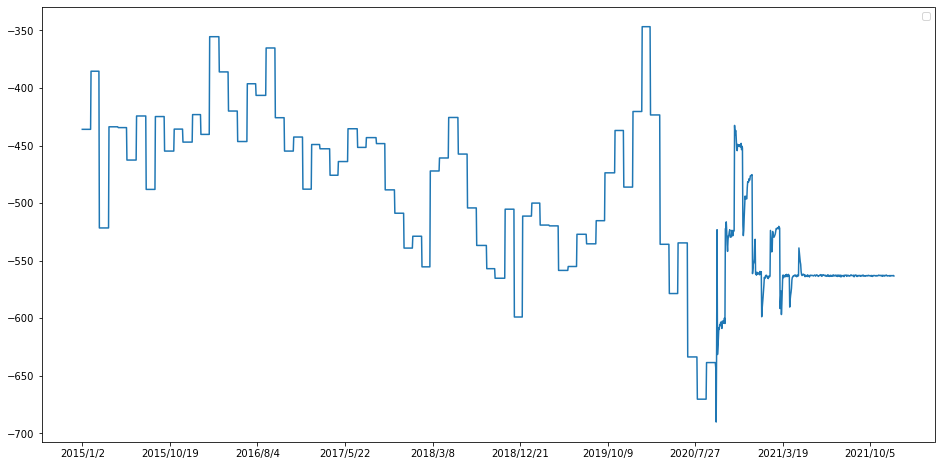

In [7]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(data['Today_value'])
plt.xticks(data.index[::200],data.index[::200])
plt.legend()
plt.show()